# <center> **PathfinderX: Resilient GPS Prediction through Machine Learning**</center>
# <center> ![GPS Signal Disruption](https://i.ibb.co/3hvSzj0/GNSS-GPS-lost.png) </center>



## <u>Introduction</u>

<div style="text-align: justify; max-width: 1300px; margin: 0 10px;">
In modern aviation, GPS is a cornerstone of safe and efficient operations, enabling precise aircraft navigation, accurate position tracking, and real-time situational awareness. However, GPS signals are vulnerable to disruptions from various factors, including atmospheric interference, signal jamming, and hardware failures. These disruptions can jeopardize flight safety, especially during critical phases of flight.

<br>

# <center> ![GPS Signal Disruption](https://i.ibb.co/zZV8j8y/gps-jam.png) </center>

To mitigate the risks associated with GPS outages, we are developing an advanced predictive model designed to estimate an aircraft's position during brief periods when GPS signals are unavailable. By utilizing historical flight data, advanced machine learning algorithms, and state-of-the-art computational techniques, this model will offer reliable location estimates, even in the absence of GPS. 

Our goal is to enhance the robustness and resilience of aviation systems, ensuring safe and accurate navigation even in the face of unforeseen disruptions. The model will not only help pilots make informed decisions but will also aid in the design of more reliable systems for future aviation technologies.

</div>


## <u>Objectives</u>

<div style="text-align: justify; max-width: 1300px; margin: 0 10px;">

1. **Data Collection and Preprocessing**: To gather and preprocess historical flight data that is critical for aircraft location prediction. This will include ensuring that key parameters such as speed, altitude, heading, time, and other environmental factors are accurately structured for model training, ensuring a reliable dataset for machine learning algorithms.

2. **Machine Learning Model Development**: To create a robust machine learning model capable of accurately predicting an aircraft's position during brief GPS outages. The model will focus on utilizing flight features that remain consistent even during these periods, ensuring minimal error in predictions.

3. **Performance Evaluation**: To thoroughly assess the model’s performance using a range of evaluation metrics, such as error margins, prediction accuracy, and real-world flight data sets. The goal is to ensure that the model can provide reliable and accurate predictions during GPS outages.

4. **Comparison with Existing Methods**: To conduct a comprehensive comparison between the proposed model and existing trajectory prediction methods. This will assess the model's effectiveness in terms of both prediction accuracy and computational efficiency, especially in GPS outage scenarios, to determine its viability in operational settings.

5. **Integration of Advanced Techniques**: To explore and integrate advanced techniques such as deep learning, hybrid models, or reinforcement learning, where applicable. These technologies will aim to improve prediction precision, particularly in complex or high-risk environments, such as congested airspace or during adverse weather conditions.

6. **Scalable and Adaptable System**: To design a system that is not only scalable but also adaptable to current aviation systems. The solution will be structured in such a way that it can be easily integrated into existing hardware and software infrastructure without requiring major changes or causing significant disruption to ongoing operations. This ensures a smooth transition and quick adoption by aviation authorities and airlines.

7. **Guiding Future Research**: To generate actionable insights and recommendations based on the findings. These will inform future research and development efforts in GPS-independent navigation systems, helping drive innovation in aviation safety and navigation technology, ultimately reducing dependency on GPS.

</div>


- **Data**: Uses `pandas` and `numpy` for data handling.
- **Modeling**: 
  - Splits data with `train_test_split`.
  - Scales features using `StandardScaler` and `MinMaxScaler`.
  - Trains with `RandomForestRegressor`, `XGBRegressor`, `LGBMRegressor`.
  - Evaluates using `mean_squared_error`, `mean_absolute_error`, `r2_score`.
- **Visualization**: Plots with `matplotlib` and `seaborn`.
- **Progress**: Tracks loops with `tqdm`.
- **Date/Time**: Manages dates with `datetime`.
- **File System**: Interacts with `os`.
- **Model Persistence**: Saves/loads models with `joblib`.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from datetime import datetime, timedelta
import os
from joblib import dump, load

In [2]:
# Create plots directory if it doesn't exist
os.makedirs('new_plots', exist_ok=True)

### **Section**: `Data Acquisition and Initial Verification`
- **Description**: 
  - Loads a CSV file (`enhanced_flight_data_curvilinear.csv`) into a DataFrame (`df`) using `pandas`.
  - Displays the first few rows of the DataFrame to verify the data structure.
- **Output**: Prints a section title and a separator line before showing the data preview.

In [3]:
print("1.1 Data Acquisition and Initial Verification")
print("-" * 50)
df = pd.read_csv('flight_data_bom_to_gau.csv')
df.head()

1.1 Data Acquisition and Initial Verification
--------------------------------------------------


,flight_number,latitude,longitude,heading,altitude,departure,arrival,timestamp
0,SpiceJet_SG1887,19.088600,72.867600,65.266788,0,BOM,GAU,2024-01-01 00:00:00
1,SpiceJet_SG1887,19.105124,72.911789,62.930999,821,BOM,GAU,2024-01-01 00:00:20
2,SpiceJet_SG1887,19.121649,72.955978,62.946715,1675,BOM,GAU,2024-01-01 00:00:40
3,SpiceJet_SG1887,19.138173,73.000166,60.419883,2584,BOM,GAU,2024-01-01 00:01:00
4,SpiceJet_SG1887,19.154697,73.044355,60.772815,3266,BOM,GAU,2024-01-01 00:01:20


In [4]:
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()
df.describe()

Dataset Shape: (20000, 8)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   flight_number  20000 non-null  object 
 1   latitude       20000 non-null  float64
 2   longitude      20000 non-null  float64
 3   heading        20000 non-null  float64
 4   altitude       20000 non-null  int64  
 5   departure      20000 non-null  object 
 6   arrival        20000 non-null  object 
 7   timestamp      20000 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 1.2+ MB


,latitude,longitude,heading,altitude
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,22.604878,82.270686,85.504375,31498.603250
std,2.035407,5.443001,54.136964,8332.433302
min,19.088600,72.867600,0.051937,0.000000
25%,20.843506,77.560497,56.765555,34911.000000
50%,22.606910,82.276121,75.745557,34975.000000
75%,24.367712,86.984785,103.841486,35039.000000
max,26.128785,91.694176,359.904257,36643.000000


### **Section**: `Data Exploration`
- **Description**:
  - Prints a title and separator line to denote the start of data exploration.
  - Displays summary statistics (mean, std, min, max, etc.) for numerical columns in the DataFrame `df` using `describe()`.
- **Output**: Summary statistics of the data.

In [5]:
print("\n1.2 Data Exploration")
print("-" * 50)

print("\nSummary Statistics:")
display(df.describe())


1.2 Data Exploration
--------------------------------------------------

Summary Statistics:


,latitude,longitude,heading,altitude
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,22.604878,82.270686,85.504375,31498.603250
std,2.035407,5.443001,54.136964,8332.433302
min,19.088600,72.867600,0.051937,0.000000
25%,20.843506,77.560497,56.765555,34911.000000
50%,22.606910,82.276121,75.745557,34975.000000
75%,24.367712,86.984785,103.841486,35039.000000
max,26.128785,91.694176,359.904257,36643.000000


In [6]:
print("Number of unique flights:", df['flight_number'].nunique())
print("Unique departure airports:", df['departure'].unique())
print("Unique arrival airports:", df['arrival'].unique())

Number of unique flights: 50
Unique departure airports: ['BOM']
Unique arrival airports: ['GAU']


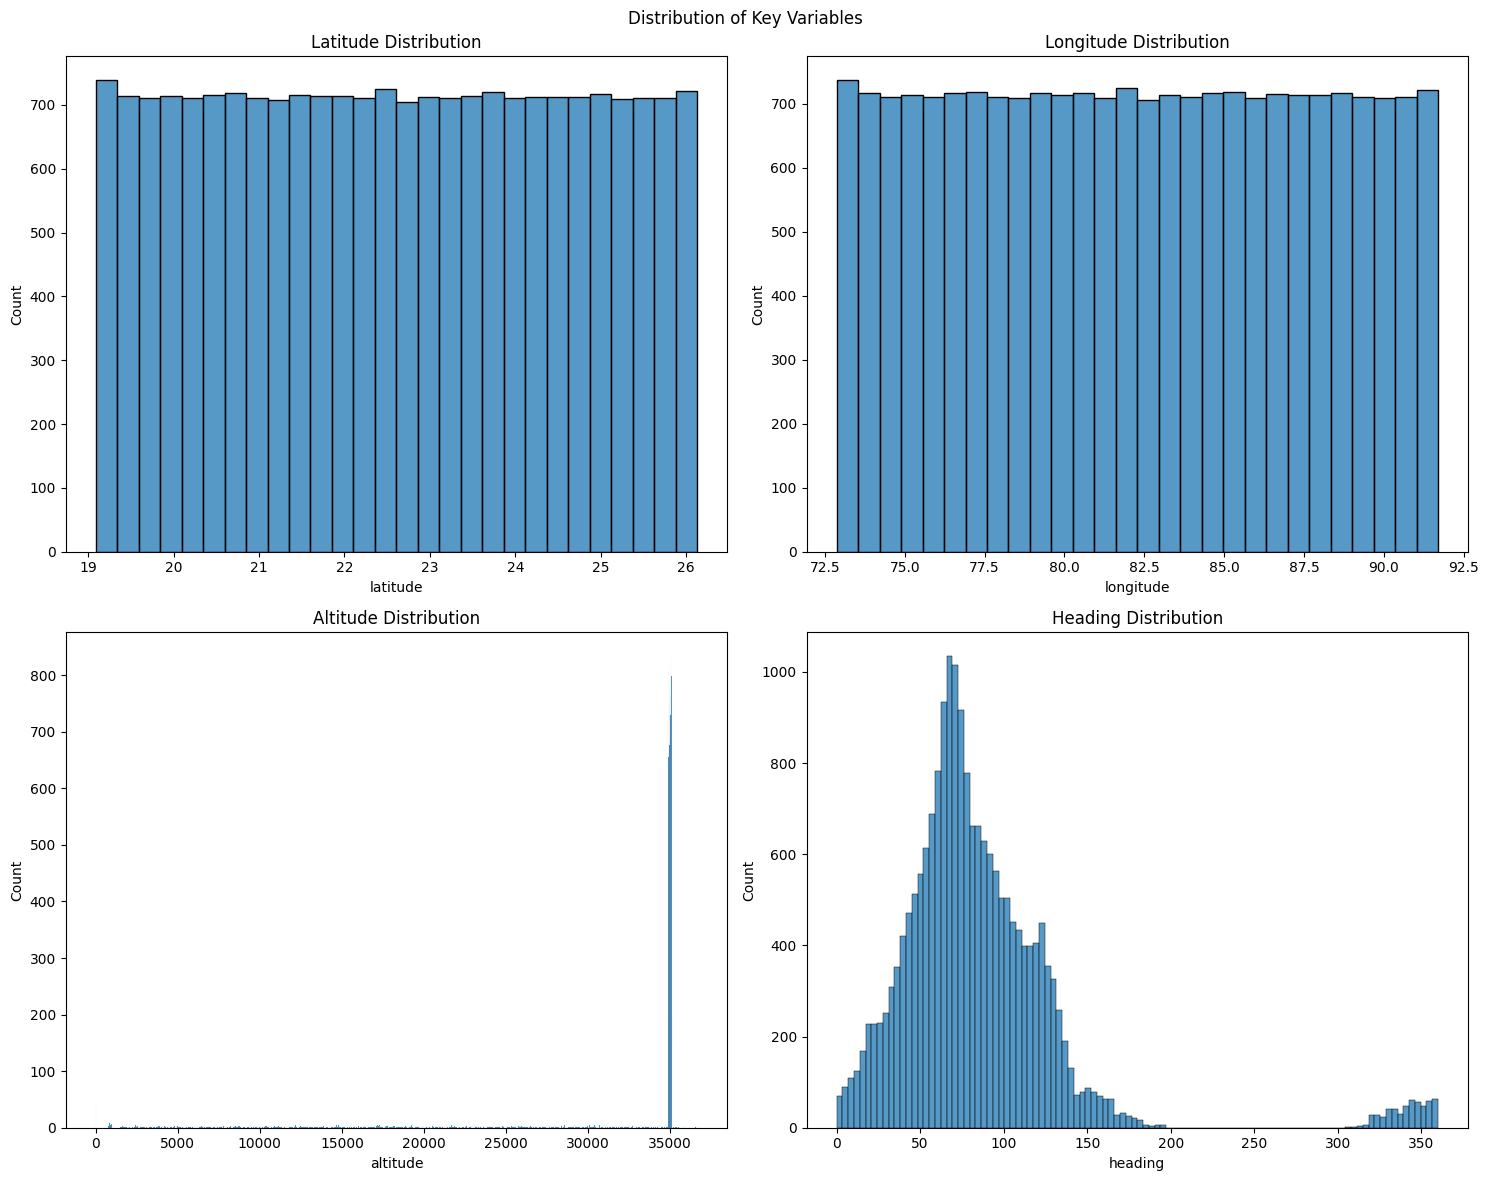

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribution of Key Variables')

sns.histplot(data=df, x='latitude', ax=axes[0,0])
axes[0,0].set_title('Latitude Distribution')

sns.histplot(data=df, x='longitude', ax=axes[0,1])
axes[0,1].set_title('Longitude Distribution')

sns.histplot(data=df, x='altitude', ax=axes[1,0])
axes[1,0].set_title('Altitude Distribution')

sns.histplot(data=df, x='heading', ax=axes[1,1])
axes[1,1].set_title('Heading Distribution')

plt.tight_layout()
plt.show()

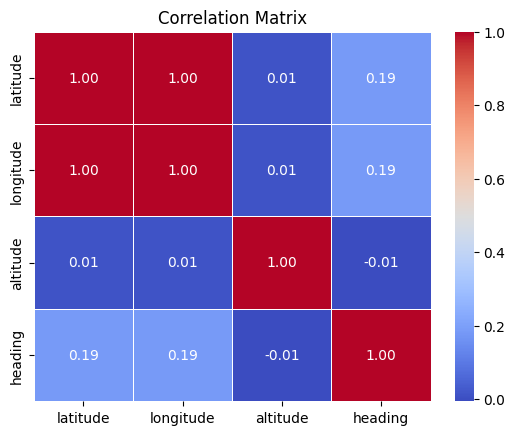


Flight Phase Counts:
phase
Descending    16562
Cruising       2298
Climbing       1140
Name: count, dtype: int64


In [8]:
# Load the CSV data
data = pd.read_csv("flight_data_bom_to_gau.csv", parse_dates=['timestamp'])

# Convert timestamp to datetime format if not done already
data['timestamp'] = pd.to_datetime(data['timestamp'])



# Check correlation between numerical variables
correlation = data[['latitude', 'longitude', 'altitude', 'heading']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Classifying flight phases based on altitude
def classify_phase(altitude):
    if altitude < 10000:
        return 'Climbing'
    elif 10000 <= altitude < 30000:
        return 'Cruising'
    else:
        return 'Descending'

data['phase'] = data['altitude'].apply(classify_phase)

# Count flight phases
phase_count = data['phase'].value_counts()
print("\nFlight Phase Counts:")
print(phase_count)

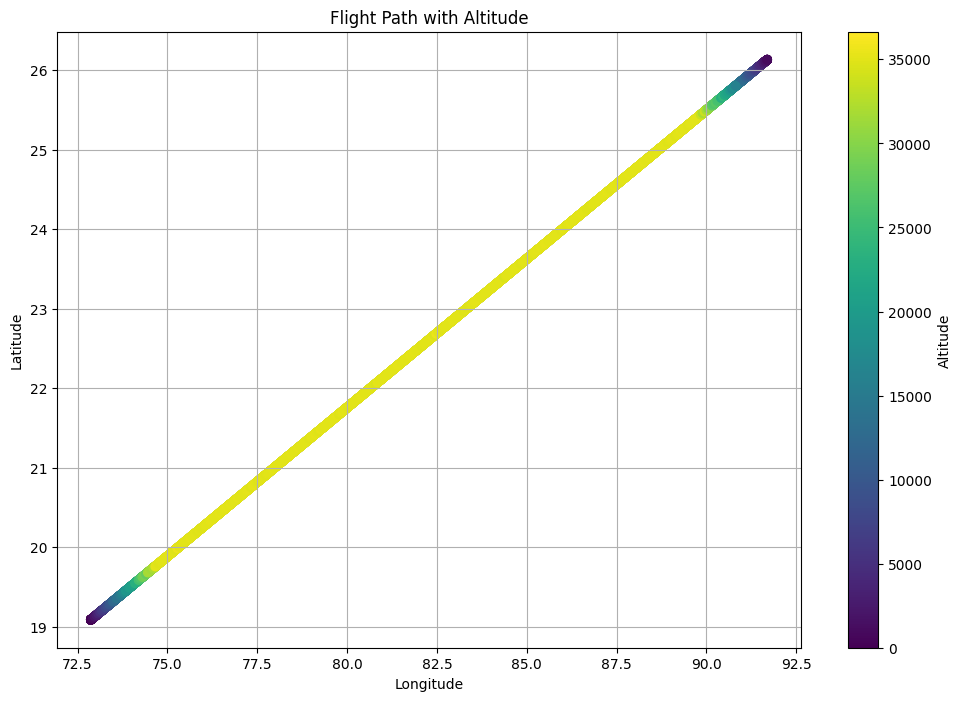

In [9]:
plt.figure(figsize=(12, 8))
plt.scatter(df['longitude'], df['latitude'], c=df['altitude'], cmap='viridis')
plt.colorbar(label='Altitude')
plt.title('Flight Path with Altitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

### **Section**: `Polynomial Regression for Latitude and Longitude Prediction`
- **Description**: 
  - Fits polynomial regression models of degree 3 to predict the latitude and longitude over time (using time index as the independent variable).
  - Uses `PolynomialFeatures` to transform the time index and `LinearRegression` to fit models for latitude and longitude.
  - Predicts the smoothed latitude and longitude values (`lat_pred`, `lon_pred`).
  - Plots the actual flight path alongside the smoothed flight path from the polynomial regression.

- **Output**: 
  - A plot comparing the actual flight path (green) and the smoothed path from the polynomial regression (orange dashed line).


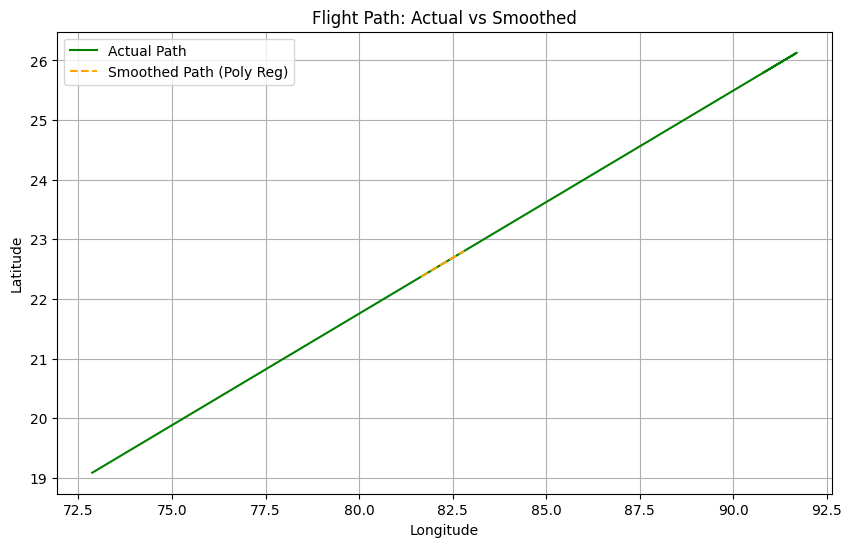

In [10]:
# Fit a polynomial regression for latitude and longitude over time
poly = PolynomialFeatures(degree=3)
X = np.array(range(len(data))).reshape(-1, 1)  # Time index
y_lat = data['latitude'].values
y_lon = data['longitude'].values

model_lat = LinearRegression().fit(poly.fit_transform(X), y_lat)
model_lon = LinearRegression().fit(poly.fit_transform(X), y_lon)

# Predicted latitudes and longitudes
data['lat_pred'] = model_lat.predict(poly.fit_transform(X))
data['lon_pred'] = model_lon.predict(poly.fit_transform(X))

# Plot the predicted flight path
plt.figure(figsize=(10, 6))
plt.plot(data['longitude'], data['latitude'], label='Actual Path', color='green')
plt.plot(data['lon_pred'], data['lat_pred'], label='Smoothed Path (Poly Reg)', color='orange', linestyle='--')
plt.title("Flight Path: Actual vs Smoothed")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)
plt.show()

### **Section**: `Flight Path Map Visualization`
- **Description**: 
  - Creates a Folium map centered around the first latitude and longitude coordinates from the dataset.
  - Iterates through the dataset, adding a blue circle marker for each data point to represent the flight path.
  - Saves the map as an HTML file (`flight_path_map.html`).

- **Output**: 
  - An HTML file (`flight_path_map.html`) displaying the flight path with markers for each data point.


In [11]:
import folium
# Create a map object centered around the first coordinates
m = folium.Map(location=[data['latitude'][0], data['longitude'][0]], zoom_start=12)

# Add markers for each data point
for idx, row in data.iterrows():
    folium.CircleMarker(location=(row['latitude'], row['longitude']), radius=2, color='blue').add_to(m)

# Save map to HTML file
m.save("flight_path_map.html")
print("Flight path map saved as 'flight_path_map.html'")



/usr/lib/python3/dist-packages/requests/__init__.py:87: RequestsDependencyWarning: urllib3 (2.2.2) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


Flight path map saved as 'flight_path_map.html'


### **Section**: `Data Cleaning`
- **Description**: 
  - Prints the section title for data cleaning.
  - Checks for missing values in each column of the DataFrame (`df`) and displays the count of missing values per column.
- **Output**: Displays the number of missing values for each column in the dataset.


In [12]:
print("\n1.3 Data Cleaning")
print("-" * 50)
print("\nMissing values:")
display(df.isnull().sum())


1.3 Data Cleaning
--------------------------------------------------

Missing values:


flight_number    0
latitude         0
longitude        0
heading          0
altitude         0
departure        0
arrival          0
timestamp        0
dtype: int64

In [13]:
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Converting timestamp to datetime 
df['timestamp'] = pd.to_datetime(df['timestamp'])


Number of duplicate rows: 0


In [14]:
df.head()

,flight_number,latitude,longitude,heading,altitude,departure,arrival,timestamp
0,SpiceJet_SG1887,19.088600,72.867600,65.266788,0,BOM,GAU,2024-01-01 00:00:00
1,SpiceJet_SG1887,19.105124,72.911789,62.930999,821,BOM,GAU,2024-01-01 00:00:20
2,SpiceJet_SG1887,19.121649,72.955978,62.946715,1675,BOM,GAU,2024-01-01 00:00:40
3,SpiceJet_SG1887,19.138173,73.000166,60.419883,2584,BOM,GAU,2024-01-01 00:01:00
4,SpiceJet_SG1887,19.154697,73.044355,60.772815,3266,BOM,GAU,2024-01-01 00:01:20


### **Class**: `FlightPredictor`
- **Description**:
  - Initializes a `FlightPredictor` class to model flight predictions for latitude (`lat`), longitude (`lon`), and altitude (`alt`).
  - **Attributes**:
    - `models`: A dictionary storing three different models (`Random Forest`, `XGBoost`, and `LightGBM`) for each coordinate (`lat`, `lon`, `alt`).
    - `scalers`: A dictionary of scalers:
      - `input`: A `StandardScaler` to standardize input features.
      - `output`: A dictionary with `MinMaxScaler` instances for scaling each coordinate's output, enhancing handling of geographic data.

In [15]:
class FlightPredictor:
    def __init__(self):
        self.models = {
            'lat': {'rf': None, 'xgb': None, 'lgbm': None},
            'lon': {'rf': None, 'xgb': None, 'lgbm': None},
            'alt': {'rf': None, 'xgb': None, 'lgbm': None}
        }
        # Use MinMaxScaler for better handling of geographic coordinates
        self.scalers = {
            'input': StandardScaler(),
            'output': {
                'lat': MinMaxScaler(),  
                'lon': MinMaxScaler(),
                'alt': MinMaxScaler()
            }
        }

### **Method**: `predict`
- **Function**: Scales input, makes predictions for `lat`, `lon`, `alt` using multiple models, then inversely scales the results.
- **Returns**: Predictions for each target across models.

In [16]:
def predict(self, sequence):
        """Enhanced prediction method with uncertainty estimation"""
        X_scaled = self.scalers['input'].transform([sequence])
        predictions = {}
        
        for target in ['lat', 'lon', 'alt']:
            predictions[target] = {}
            for model_name, model in self.models[target].items():
                pred = model.predict(X_scaled)
                predictions[target][model_name] = self.scalers['output'][target].inverse_transform(
                    pred.reshape(-1, 1))[0][0]
        
        return predictions
FlightPredictor.predict = predict

### **Method**: `prepare_data`
- **Function**: Adds enhanced features to the data:
  - Time-based features (`hour_sin`, `hour_cos`, `minute_sin`, `minute_cos`).
  - Movement features (speed, change, acceleration, rolling stats).
  - Calculates bearing and rate of bearing change.
  - Fills missing values with forward/backward fill.
- **Returns**: DataFrame with enhanced features.

In [17]:
def prepare_data(self, df):
        print("Preparing enhanced data features...")
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        
        # Enhanced time-based features
        df['hour_sin'] = np.sin(2 * np.pi * df['timestamp'].dt.hour / 24)
        df['hour_cos'] = np.cos(2 * np.pi * df['timestamp'].dt.hour / 24)
        df['minute_sin'] = np.sin(2 * np.pi * df['timestamp'].dt.minute / 60)
        df['minute_cos'] = np.cos(2 * np.pi * df['timestamp'].dt.minute / 60)
        
        # Calculate time differences and speeds more accurately
        df['time_elapsed'] = df.groupby('flight_number')['timestamp'].diff().dt.total_seconds().fillna(0)
        df['cumulative_time'] = df.groupby('flight_number')['time_elapsed'].cumsum()
        
        # Enhanced movement features
        for param in ['latitude', 'longitude', 'altitude']:
            # Calculate changes
            df[f'{param}_change'] = df.groupby('flight_number')[param].diff().fillna(0)
            
            # Calculate speeds (using haversine formula for lat/lon)
            if param in ['latitude', 'longitude']:
                df[f'{param}_speed'] = df[f'{param}_change'] / df['time_elapsed'].replace(0, np.nan)
            else:
                df[f'{param}_speed'] = df[f'{param}_change'] / df['time_elapsed'].replace(0, np.nan)
            
            # Calculate accelerations
            df[f'{param}_acceleration'] = df.groupby('flight_number')[f'{param}_speed'].diff().fillna(0)
            
            # Add rolling statistics
            df[f'{param}_rolling_mean'] = df.groupby('flight_number')[param].rolling(
                window=5, min_periods=1).mean().reset_index(0, drop=True)
            df[f'{param}_rolling_std'] = df.groupby('flight_number')[param].rolling(
                window=5, min_periods=1).std().reset_index(0, drop=True)
        
        # Calculate bearing and rate of bearing change
        df['bearing'] = np.arctan2(df['longitude_change'], df['latitude_change'])
        df['bearing_change'] = df.groupby('flight_number')['bearing'].diff().fillna(0)
        
        # Handle missing values
        df = df.fillna(method='ffill').fillna(method='bfill')
        
        return df
FlightPredictor.prepare_data = prepare_data

### **Method**: `create_sequences`
- **Function**: Creates sequences of data for model training:
  - Loops through unique flight numbers.
  - For each flight, creates sequences of features and target values (latitude, longitude, altitude).
  - Uses the specified `sequence_length` to generate sequences and corresponding targets.
  - Returns feature sequences and target arrays for lat, lon, and alt.

In [18]:
def create_sequences(self, df, sequence_length=10):
        print("Creating enhanced sequences...")
        features = []
        targets = {'lat': [], 'lon': [], 'alt': []}
        
        feature_columns = [
            'heading', 'bearing', 'bearing_change',
            'latitude_speed', 'longitude_speed', 'altitude_speed',
            'latitude_acceleration', 'longitude_acceleration', 'altitude_acceleration',
            'latitude_rolling_mean', 'longitude_rolling_mean', 'altitude_rolling_mean',
            'latitude_rolling_std', 'longitude_rolling_std', 'altitude_rolling_std',
            'hour_sin', 'hour_cos', 'minute_sin', 'minute_cos',
            'cumulative_time'
        ]
        
        for flight in df['flight_number'].unique():
            flight_data = df[df['flight_number'] == flight].copy()
            
            if len(flight_data) < sequence_length + 1:
                continue
                
            for i in range(len(flight_data) - sequence_length):
                sequence = flight_data.iloc[i:i+sequence_length]
                target = flight_data.iloc[i+sequence_length]
                
                feature_row = []
                for _, row in sequence.iterrows():
                    feature_row.extend(row[feature_columns])
                
                features.append(feature_row)
                targets['lat'].append(target['latitude'])
                targets['lon'].append(target['longitude'])
                targets['alt'].append(target['altitude'])
        
        return np.array(features), {k: np.array(v) for k, v in targets.items()}
FlightPredictor.create_sequences = create_sequences

### **Method**: `train_models`
- **Function**: Trains machine learning models for predicting flight parameters (latitude, longitude, altitude):
  - Scales the input features `X` and output labels `y`.
  - Defines model parameters for RandomForest, XGBoost, and LightGBM.
  - Fits the models for each target (lat, lon, alt) using the scaled data.
  - Saves the trained models in the `self.models` dictionary.

In [19]:
def train_models(self, X, y):
        print("Training enhanced models...")
        X_scaled = self.scalers['input'].fit_transform(X)
        
        model_params = {
            'rf': {
                'n_estimators': 200,
                'max_depth': 15,
                'min_samples_split': 5,
                'random_state': 42,
                'n_jobs': -1
            },
            'xgb': {
                'n_estimators': 200,
                'max_depth': 8,
                'learning_rate': 0.05,
                'random_state': 42
            },
            'lgbm': {
                'n_estimators': 200,
                'max_depth': 8,
                'learning_rate': 0.05,
                'random_state': 42
            }
        }
        
        for target in ['lat', 'lon', 'alt']:
            y_scaled = self.scalers['output'][target].fit_transform(y[target].reshape(-1, 1))
            
            self.models[target]['rf'] = RandomForestRegressor(**model_params['rf'])
            self.models[target]['xgb'] = XGBRegressor(**model_params['xgb'])
            self.models[target]['lgbm'] = LGBMRegressor(**model_params['lgbm'])
            
            for model_name in self.models[target]:
                print(f"Training {model_name.upper()} for {target}...")
                self.models[target][model_name].fit(X_scaled, y_scaled.ravel())

FlightPredictor.train_models = train_models

### **Method**: `animate_trajectory`
- **Function**: Animates the flight trajectory with actual and predicted values during an outage:
  - Displays the trajectory in real-time using `matplotlib`.
  - Handles pre-outage, outage, and post-outage periods with actual data and predictions.
  - Updates the position of the aircraft, showing predictions during the outage.
  - Provides a status indicator (`Normal Operation`/`GPS Outage - Using Predictions`).
  - Shows timestamp and includes a legend.
  - Uses `FuncAnimation` for dynamic plotting and visual updates.

### Key Features
1. **Pre-outage**: Shows actual path.
2. **Outage**: Displays predictions from models (RF, XGB, LGBM).
3. **Post-outage**: Returns to actual data.
4. **Dynamic Status**: Green for normal, red for outage.
5. **Interactive Animation**: Inline display using JS HTML.

In [20]:
def animate_trajectory(self, df, flight_id, actual_values, predictions, outage_duration, animation_duration=30):
    """
    Animate the flight trajectory in real-time, including the outage period and predictions.
    
    Parameters:
        df: DataFrame with all flight data
        flight_id: ID of the flight to animate
        actual_values: DataFrame with actual values during outage
        predictions: Dict of model predictions during outage
        outage_duration: Duration of the outage in seconds
        animation_duration: Desired duration of animation in seconds (default: 30)
    """
    import matplotlib.pyplot as plt
    import matplotlib.animation as animation
    from matplotlib.lines import Line2D
    from IPython.display import display, HTML
        
    # Get complete flight data
    flight_data = df[df['flight_number'] == flight_id].copy()
    
    # Calculate outage indices
    outage_start_idx = flight_data.index.get_indexer([actual_values.index[0]])[0]
    outage_end_idx = flight_data.index.get_indexer([actual_values.index[-1]])[0]
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Set up lines for actual trajectory and predictions
    line_actual, = ax.plot([], [], 'k-', label='Actual Path', linewidth=2)
    line_rf, = ax.plot([], [], '#FF6B6B', label='RF Prediction', alpha=0.7)
    line_xgb, = ax.plot([], [], '#4ECDC4', label='XGB Prediction', alpha=0.7)
    line_lgbm, = ax.plot([], [], '#45B7D1', label='LGBM Prediction', alpha=0.7)
    current_pos, = ax.plot([], [], 'ro', markersize=10, label='Current Position')
    
    # Calculate frame interval based on desired animation duration
    total_frames = len(flight_data) + len(actual_values)
    interval = (animation_duration * 1000) / total_frames  # Convert to milliseconds
    
    # Set plot limits
    ax.set_xlim(flight_data['longitude'].min() - 0.1,
                flight_data['longitude'].max() + 0.1)
    ax.set_ylim(flight_data['latitude'].min() - 0.1,
                flight_data['latitude'].max() + 0.1)
    
    # Add grid and labels
    ax.grid(True)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'Flight {flight_id} Trajectory Animation')
    
    # Add timestamp text
    timestamp_text = ax.text(0.02, 0.98, '', transform=ax.transAxes,
                             verticalalignment='top')
    
    # Add status indicator
    status_text = ax.text(0.02, 0.94, '', transform=ax.transAxes,
                          verticalalignment='top', color='green')
    
    def init():
        """Initialize animation"""
        line_actual.set_data([], [])
        line_rf.set_data([], [])
        line_xgb.set_data([], [])
        line_lgbm.set_data([], [])
        current_pos.set_data([], [])
        return line_actual, line_rf, line_xgb, line_lgbm, current_pos
    
    def animate(frame):
        """Animation function called for each frame"""
        if frame <= outage_start_idx:
            # Pre-outage period
            data = flight_data.iloc[:frame+1]
            line_actual.set_data(data['longitude'], data['latitude'])
            current_pos.set_data([data.iloc[-1]['longitude']], 
                            [data.iloc[-1]['latitude']])
            status_text.set_text('Status: Normal Operation')
            status_text.set_color('green')
            
        elif frame <= outage_end_idx:
            # During outage period
            # Plot actual path up to outage
            pre_outage = flight_data.iloc[:outage_start_idx+1]
            line_actual.set_data(pre_outage['longitude'], pre_outage['latitude'])
            
            # Plot predictions
            idx = frame - outage_start_idx - 1
            line_rf.set_data(predictions['rf']['lon'][:idx+1],
                        predictions['rf']['lat'][:idx+1])
            line_xgb.set_data(predictions['xgb']['lon'][:idx+1],
                            predictions['xgb']['lat'][:idx+1])
            line_lgbm.set_data(predictions['lgbm']['lon'][:idx+1],
                            predictions['lgbm']['lat'][:idx+1])
            
            # Update current position using RF prediction
            current_pos.set_data([predictions['rf']['lon'][idx]],
                            [predictions['rf']['lat'][idx]])
            
            status_text.set_text('Status: GPS Outage - Using Predictions')
            status_text.set_color('red')
            
        else:
            # Post-outage period
            data = flight_data.iloc[:frame+1]
            line_actual.set_data(data['longitude'], data['latitude'])
            current_pos.set_data([data.iloc[-1]['longitude']],
                            [data.iloc[-1]['latitude']])
            status_text.set_text('Status: Normal Operation')
            status_text.set_color('green')
        
        # Update timestamp
        timestamp = flight_data.iloc[min(frame, len(flight_data)-1)]['timestamp']
        timestamp_text.set_text(f'Time: {timestamp}')
        
        return line_actual, line_rf, line_xgb, line_lgbm, current_pos
    
    # Create animation
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=len(flight_data),
                                   interval=interval, blit=True)
    
    # Display the animation inline
    display(HTML(anim.to_jshtml()))

    plt.legend()
    plt.tight_layout()
    plt.show()

FlightPredictor.animate_trajectory = animate_trajectory

### Method: `animate_trajectory_folium`

This method creates an interactive map animation using **Folium** to visualize the trajectory of a flight, including actual paths, model predictions, and error metrics during an outage. It overlays various paths on the map, such as the actual flight path before, during, and after the outage, along with the predicted paths from different models (e.g., Random Forest, XGBoost, and LightGBM). The method calculates the error between actual and predicted coordinates using the **Haversine formula** and displays error metrics such as average and maximum error for each model. Additionally, it provides a dynamic legend and a detailed error metrics box. 
# <center> ![Folium Map with Trajectory and Predictions](https://i.ibb.co/jkf404S/sample-map.png) </center>

#### Features:
- Visualizes the flight path before, during, and after the outage
- Compares actual and predicted flight paths with error metrics
- Adds a legend for easy identification of the paths
- Saves the interactive map to an HTML file for viewing

In [21]:
def animate_trajectory_folium(self, df, flight_id, actual_values, predictions, outage_duration, save_path='flight_animation.html'):
    """
    Create a Folium map animation with detailed outage analysis and error metrics.
    
    Parameters:
        df: DataFrame with all flight data
        flight_id: ID of the flight to animate
        actual_values: DataFrame with actual values during outage
        predictions: Dict of model predictions during outage
        outage_duration: Duration of the outage in seconds
        save_path: Path to save the HTML file (default: 'flight_animation.html')
    """
    import folium
    from folium import plugins
    import numpy as np
    from math import radians, sin, cos, sqrt, atan2
    
    def calculate_error(actual_lat, actual_lon, pred_lat, pred_lon):
        """Calculate distance error in kilometers using Haversine formula"""
        R = 6371  # Earth's radius in kilometers
        
        lat1, lon1 = radians(actual_lat), radians(actual_lon)
        lat2, lon2 = radians(pred_lat), radians(pred_lon)
        
        dlat = lat2 - lat1
        dlon = lon2 - lon1
        
        a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
        c = 2 * atan2(sqrt(a), sqrt(1-a))
        return R * c
    
    try:
        # Get complete flight data
        flight_data = df[df['flight_number'] == flight_id].copy()
        
        # Calculate outage indices
        outage_start_idx = flight_data.index.get_indexer([actual_values.index[0]])[0]
        outage_end_idx = flight_data.index.get_indexer([actual_values.index[-1]])[0]
        
        # Create base map centered on the outage area
        center_lat = actual_values['latitude'].mean()
        center_lon = actual_values['longitude'].mean()
        m = folium.Map(location=[center_lat, center_lon], zoom_start=10)
        
        # Draw actual path before outage
        pre_outage_coords = flight_data.iloc[:outage_start_idx+1][['latitude', 'longitude']].values.tolist()
        folium.PolyLine(
            locations=pre_outage_coords,
            color='#000000',
            weight=3,
            opacity=0.3,
            popup='Pre-outage Path'
        ).add_to(m)
        
        # Draw actual path during outage
        actual_outage_coords = actual_values[['latitude', 'longitude']].values.tolist()
        folium.PolyLine(
            locations=actual_outage_coords,
            color='#000000',
            weight=4,
            opacity=1.0,
            popup='Actual Path During Outage'
        ).add_to(m)
        
        # Calculate and display errors for each model
        model_colors = {
            'rf': '#FF0000',    # Red
            'xgb': '#00FF00',   # Green
            'lgbm': '#0000FF'   # Blue
        }
        
        error_html = '<div style="white-space: pre-line;">'
        
        for model, color in model_colors.items():
            pred_coords = list(zip(predictions[model]['lat'], predictions[model]['lon']))
            
            # Calculate average error for this model
            errors = []
            for i in range(len(actual_values)):
                error = calculate_error(
                    actual_values['latitude'].iloc[i],
                    actual_values['longitude'].iloc[i],
                    predictions[model]['lat'][i],
                    predictions[model]['lon'][i]
                )
                errors.append(error)
            
            avg_error = sum(errors) / len(errors)
            max_error = max(errors)
            
            # Draw prediction line
            folium.PolyLine(
                locations=pred_coords,
                color=color,
                weight=3,
                opacity=0.8,
                popup=f'{model.upper()} Prediction\nAvg Error: {avg_error:.2f}km\nMax Error: {max_error:.2f}km',
                dash_array='5, 10'
            ).add_to(m)
            
            error_html += f'{model.upper()} Prediction:\n'
            error_html += f'Average Error: {avg_error:.2f} km\n'
            error_html += f'Maximum Error: {max_error:.2f} km\n\n'
        
        error_html += '</div>'
        
        # Draw actual path after outage
        post_outage_coords = flight_data.iloc[outage_end_idx+1:][['latitude', 'longitude']].values.tolist()
        folium.PolyLine(
            locations=post_outage_coords,
            color='#000000',
            weight=3,
            opacity=0.3,
            popup='Post-outage Path'
        ).add_to(m)
        
        # Add error metrics box
        error_box_html = f'''
        <div style="position: fixed; top: 20px; right: 20px; z-index: 1000; 
             background-color: white; padding: 15px; border: 2px solid grey; 
             border-radius: 5px; opacity: 0.9; max-width: 300px; font-family: monospace;">
            <h4 style="margin-top: 0;">Error Metrics During Outage</h4>
            {error_html}
            <div style="margin-top: 10px;">
                Outage Duration: {outage_duration} seconds
            </div>
        </div>
        '''
        
        # Add legend
        legend_html = '''
        <div style="position: fixed; bottom: 50px; left: 50px; z-index: 1000; 
             background-color: white; padding: 15px; border: 2px solid grey; 
             border-radius: 5px; opacity: 0.9;">
            <h4 style="margin-top: 0;">Path Legend</h4>
            <div style="margin-bottom: 5px;">
                <span style="display: inline-block; width: 20px; height: 3px; 
                      background-color: #000000; opacity: 0.3; margin-right: 5px;"></span>
                Normal Flight Path
            </div>
            <div style="margin-bottom: 5px;">
                <span style="display: inline-block; width: 20px; height: 3px; 
                      background-color: #000000; margin-right: 5px;"></span>
                Actual Path During Outage
            </div>
            <div style="margin-bottom: 5px;">
                <span style="display: inline-block; width: 20px; height: 3px; 
                      background-color: #FF0000; margin-right: 5px; 
                      border-top: 3px dashed;"></span>
                RF Prediction
            </div>
            <div style="margin-bottom: 5px;">
                <span style="display: inline-block; width: 20px; height: 3px; 
                      background-color: #00FF00; margin-right: 5px; 
                      border-top: 3px dashed;"></span>
                XGBoost Prediction
            </div>
            <div style="margin-bottom: 5px;">
                <span style="display: inline-block; width: 20px; height: 3px; 
                      background-color: #0000FF; margin-right: 5px; 
                      border-top: 3px dashed;"></span>
                LightGBM Prediction
            </div>
        </div>
        '''
        
        # Add both HTML elements to map
        m.get_root().html.add_child(folium.Element(error_box_html))
        m.get_root().html.add_child(folium.Element(legend_html))
        
        # Save the map
        try:
            m.save(save_path)
            print(f"Map successfully saved to {save_path}")
        except Exception as e:
            print(f"Error saving map: {str(e)}")
            
    except Exception as e:
        print(f"An error occurred while creating the map: {str(e)}")
        print("Please check your input data and try again.")

# Add method to class
FlightPredictor.animate_trajectory_folium = animate_trajectory_folium

### Method: `simulate_outage` 

Simulates a GPS outage for a flight by:

1. **Random Outage Duration**: Chooses an outage duration between 120-300 seconds.
2. **Random Start Time**: Selects a random start index for the outage.
3. **Model Predictions**: Uses RF, XGB, and LGBM models to predict `lat`, `lon`, and `alt` during the outage.
4. **Sequence Update**: Updates feature sequences with predicted values for continuous simulation.

**Returns**: 
- **actual values** 
- **predictions** 
- **outage duration**


In [22]:
# def simulate_outage(self, df, flight_id):
#         print(f"Simulating outage for flight {flight_id}...")
#         flight_data = df[df['flight_number'] == flight_id].copy()
        
#         # Random outage duration between 2 to 5 minutes (120 to 300 seconds)
#         outage_duration = np.random.randint(480, 600)
#         print(f"Simulated outage duration: {outage_duration} seconds")
        
#         # Randomly select outage start time
#         valid_start_indices = len(flight_data) - (outage_duration // 20) - 10
#         outage_start_idx = np.random.randint(10, valid_start_indices)
#         outage_end_idx = outage_start_idx + (outage_duration // 20)
        
#         actual_values = flight_data.iloc[outage_start_idx:outage_end_idx+1]
        
#         predictions = {
#             'rf': {'lat': [], 'lon': [], 'alt': []},
#             'xgb': {'lat': [], 'lon': [], 'alt': []},
#             'lgbm': {'lat': [], 'lon': [], 'alt': []}
#         }
        
#         sequence_length = 10
#         current_sequence = flight_data.iloc[outage_start_idx-sequence_length:outage_start_idx]
        
#         # Updated feature columns to match the new model
#         feature_columns = [
#             'heading', 'bearing', 'bearing_change',
#             'latitude_speed', 'longitude_speed', 'altitude_speed',
#             'latitude_acceleration', 'longitude_acceleration', 'altitude_acceleration',
#             'latitude_rolling_mean', 'longitude_rolling_mean', 'altitude_rolling_mean',
#             'latitude_rolling_std', 'longitude_rolling_std', 'altitude_rolling_std',
#             'hour_sin', 'hour_cos', 'minute_sin', 'minute_cos',
#             'cumulative_time'
#         ]
        
#         for _ in range(outage_end_idx - outage_start_idx + 1):
#             feature_row = []
#             for _, row in current_sequence.iterrows():
#                 feature_row.extend(row[feature_columns])
            
#             X_scaled = self.scalers['input'].transform([feature_row])
            
#             for target in ['lat', 'lon', 'alt']:
#                 for model_name in ['rf', 'xgb', 'lgbm']:
#                     pred = self.models[target][model_name].predict(X_scaled)
#                     pred = self.scalers['output'][target].inverse_transform(pred.reshape(-1, 1))
#                     predictions[model_name][target].append(pred[0][0])
            
#             # Update sequence with predicted values
#             new_row = current_sequence.iloc[-1].copy()
#             new_row['latitude'] = predictions['rf']['lat'][-1]
#             new_row['longitude'] = predictions['rf']['lon'][-1]
#             new_row['altitude'] = predictions['rf']['alt'][-1]
            
#             # Update derived features for the new row
#             self._update_derived_features(new_row, current_sequence)
            
#             # Update the sequence
#             current_sequence = pd.concat([current_sequence[1:], pd.DataFrame([new_row])])
        
#         return actual_values, predictions, outage_duration
# FlightPredictor.simulate_outage = simulate_outage
def simulate_outage(self, df, flight_id):
    print(f"Simulating outage for flight {flight_id}...")
    flight_data = df[df['flight_number'] == flight_id].copy()
    
    # Random outage duration between 8 to 10 minutes (480 to 600 seconds)
    outage_duration = np.random.randint(480, 600)
    print(f"Simulated outage duration: {outage_duration} seconds")
    
    # Calculate valid start time range (75% to 90% of flight duration)
    total_records = len(flight_data)
    start_75_percent = int(total_records * 0.85)
    start_90_percent = int(total_records * 0.95)
    
    # Ensure we have enough room for the outage duration
    outage_records = outage_duration // 20  # Convert seconds to number of 20-second records
    if start_90_percent + outage_records >= total_records:
        start_90_percent = total_records - outage_records - 1
    
    # Randomly select outage start time within the specified range
    outage_start_idx = np.random.randint(start_75_percent, start_90_percent)
    outage_end_idx = outage_start_idx + (outage_duration // 20)
    
    actual_values = flight_data.iloc[outage_start_idx:outage_end_idx+1]
    predictions = {
        'rf': {'lat': [], 'lon': [], 'alt': []},
        'xgb': {'lat': [], 'lon': [], 'alt': []},
        'lgbm': {'lat': [], 'lon': [], 'alt': []}
    }
    
    sequence_length = 10
    current_sequence = flight_data.iloc[outage_start_idx-sequence_length:outage_start_idx]
    
    # Updated feature columns to match the new model
    feature_columns = [
        'heading', 'bearing', 'bearing_change',
        'latitude_speed', 'longitude_speed', 'altitude_speed',
        'latitude_acceleration', 'longitude_acceleration', 'altitude_acceleration',
        'latitude_rolling_mean', 'longitude_rolling_mean', 'altitude_rolling_mean',
        'latitude_rolling_std', 'longitude_rolling_std', 'altitude_rolling_std',
        'hour_sin', 'hour_cos', 'minute_sin', 'minute_cos',
        'cumulative_time'
    ]
    
    for _ in range(outage_end_idx - outage_start_idx + 1):
        feature_row = []
        for _, row in current_sequence.iterrows():
            feature_row.extend(row[feature_columns])
        
        X_scaled = self.scalers['input'].transform([feature_row])
        
        for target in ['lat', 'lon', 'alt']:
            for model_name in ['rf', 'xgb', 'lgbm']:
                pred = self.models[target][model_name].predict(X_scaled)
                pred = self.scalers['output'][target].inverse_transform(pred.reshape(-1, 1))
                predictions[model_name][target].append(pred[0][0])
        
        # Update sequence with predicted values
        new_row = current_sequence.iloc[-1].copy()
        new_row['latitude'] = predictions['rf']['lat'][-1]
        new_row['longitude'] = predictions['rf']['lon'][-1]
        new_row['altitude'] = predictions['rf']['alt'][-1]
        
        # Update derived features for the new row
        self._update_derived_features(new_row, current_sequence)
        
        # Update the sequence
        current_sequence = pd.concat([current_sequence[1:], pd.DataFrame([new_row])])
    
    return actual_values, predictions, outage_duration

FlightPredictor.simulate_outage = simulate_outage

### Method: `_update_derived_features` 

Updates derived features for a new row based on the current sequence of flight data.

1. **Time-based features**: 
   - `hour_sin`, `hour_cos`, `minute_sin`, `minute_cos`
2. **Speed and acceleration**:
   - Calculated for `latitude`, `longitude`, and `altitude` based on changes from the previous row.
3. **Rolling statistics**:
   - `rolling_mean`, `rolling_std` for recent values (last 4 points + current).
4. **Bearing features**:
   - Calculates `bearing` and `bearing_change` based on latitude and longitude.

**Returns**: Updated row with new derived features.


In [23]:
def _update_derived_features(self, new_row, current_sequence):
        """Helper method to update derived features for a new row"""
        # Update time-based features
        new_row['hour_sin'] = np.sin(2 * np.pi * new_row['timestamp'].hour / 24)
        new_row['hour_cos'] = np.cos(2 * np.pi * new_row['timestamp'].hour / 24)
        new_row['minute_sin'] = np.sin(2 * np.pi * new_row['timestamp'].minute / 60)
        new_row['minute_cos'] = np.cos(2 * np.pi * new_row['timestamp'].minute / 60)
        
        # Update speed and acceleration features
        last_row = current_sequence.iloc[-1]
        time_elapsed = (new_row['timestamp'] - last_row['timestamp']).total_seconds()
        
        for param in ['latitude', 'longitude', 'altitude']:
            # Calculate changes
            param_change = new_row[param] - last_row[param]
            new_row[f'{param}_change'] = param_change
            
            # Update speeds
            new_row[f'{param}_speed'] = param_change / time_elapsed if time_elapsed > 0 else 0
            
            # Update accelerations
            speed_change = new_row[f'{param}_speed'] - last_row[f'{param}_speed']
            new_row[f'{param}_acceleration'] = speed_change / time_elapsed if time_elapsed > 0 else 0
            
            # Update rolling statistics
            recent_values = list(current_sequence[param].iloc[-4:]) + [new_row[param]]
            new_row[f'{param}_rolling_mean'] = np.mean(recent_values)
            new_row[f'{param}_rolling_std'] = np.std(recent_values)
        
        # Update bearing features
        new_row['bearing'] = np.arctan2(new_row['longitude_change'], new_row['latitude_change'])
        new_row['bearing_change'] = new_row['bearing'] - last_row['bearing']
        
        return new_row
FlightPredictor._update_derived_features = _update_derived_features

### Method: `animate_outage_only` 

Animates actual vs predicted flight paths during an outage.

#### Params:
- **actual_values**: Actual trajectory data.
- **predictions**: Dictionary of model predictions.
- **outage_duration**: Duration of outage (seconds).
- **animation_duration**: Duration of animation (default 10s).

#### Key Steps:
- Sets up plot with actual and predicted paths.
- Calculates frame interval based on data length.
- Updates paths and calculates error (Haversine distance) per frame.
- Displays animated plot with error metrics.

#### Result:
- Animation of flight paths with real-time error metrics.

In [24]:
def animate_outage_only(self, actual_values, predictions, outage_duration, animation_duration=10):
    """
    Animate only the outage period showing actual vs predicted trajectories.
    
    Parameters:
        actual_values: DataFrame with actual values during outage
        predictions: Dict of model predictions during outage
        outage_duration: Duration of the outage in seconds
        animation_duration: Desired duration of animation in seconds (default: 10)
    """
    import matplotlib.pyplot as plt
    import matplotlib.animation as animation
    from math import radians, sin, cos, sqrt, atan2
    from IPython.display import display, HTML
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Set up lines for actual trajectory and predictions
    line_actual, = ax.plot([], [], 'k--', label='Actual Path', linewidth=2)
    line_rf, = ax.plot([], [], '#FF6B6B', label='RF Prediction', alpha=0.7)
    line_xgb, = ax.plot([], [], '#4ECDC4', label='XGB Prediction', alpha=0.7)
    line_lgbm, = ax.plot([], [], '#45B7D1', label='LGBM Prediction', alpha=0.7)
    current_points = [
        ax.plot([], [], 'o', markersize=8, label=f'{model} Current')[0]
        for model in ['Actual', 'RF', 'XGB', 'LGBM']
    ]
    
    # Calculate frame interval
    total_frames = len(actual_values)
    interval = (animation_duration * 1000) / total_frames  # Convert to milliseconds
    
    # Set plot limits with padding
    lon_min = min(actual_values['longitude'].min(), 
                  min(min(predictions[m]['lon']) for m in predictions))
    lon_max = max(actual_values['longitude'].max(), 
                  max(max(predictions[m]['lon']) for m in predictions))
    lat_min = min(actual_values['latitude'].min(), 
                  min(min(predictions[m]['lat']) for m in predictions))
    lat_max = max(actual_values['latitude'].max(), 
                  max(max(predictions[m]['lat']) for m in predictions))
    
    # Add 10% padding
    lon_pad = (lon_max - lon_min) * 0.1
    lat_pad = (lat_max - lat_min) * 0.1
    ax.set_xlim(lon_min - lon_pad, lon_max + lon_pad)
    ax.set_ylim(lat_min - lat_pad, lat_max + lat_pad)
    
    # Add grid and labels
    ax.grid(True)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('Flight Trajectory During GPS Outage\nActual vs. Predicted Paths')
    
    # Add timestamp and metrics text
    timestamp_text = ax.text(0.02, 0.98, '', transform=ax.transAxes,
                             verticalalignment='top')
    metrics_text = ax.text(0.02, 0.90, '', transform=ax.transAxes,
                           verticalalignment='top', fontsize=9)
    
    def init():
        """Initialize animation"""
        line_actual.set_data([], [])
        line_rf.set_data([], [])
        line_xgb.set_data([], [])
        line_lgbm.set_data([], [])
        for point in current_points:
            point.set_data([], [])
        return [line_actual, line_rf, line_xgb, line_lgbm] + current_points
    
    def calculate_error(actual_lat, actual_lon, pred_lat, pred_lon):
        """Calculate distance error in kilometers using Haversine formula"""
        R = 6371  # Earth's radius in kilometers
        
        lat1, lon1 = radians(actual_lat), radians(actual_lon)
        lat2, lon2 = radians(pred_lat), radians(pred_lon)
        
        dlat = lat2 - lat1
        dlon = lon2 - lon1
        
        a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
        c = 2 * atan2(sqrt(a), sqrt(1-a))
        distance = R * c
        
        return distance
    
    def animate(frame):
        """Animation function called for each frame"""
        # Update actual path
        line_actual.set_data(actual_values['longitude'][:frame+1],
                             actual_values['latitude'][:frame+1])
        
        # Update predicted paths
        line_rf.set_data(predictions['rf']['lon'][:frame+1],
                         predictions['rf']['lat'][:frame+1])
        line_xgb.set_data(predictions['xgb']['lon'][:frame+1],
                          predictions['xgb']['lat'][:frame+1])
        line_lgbm.set_data(predictions['lgbm']['lon'][:frame+1],
                           predictions['lgbm']['lat'][:frame+1])
        
        # Update current positions
        current_points[0].set_data([actual_values['longitude'].iloc[frame]],
                                   [actual_values['latitude'].iloc[frame]])
        
        errors = []
        for i, model in enumerate(['rf', 'xgb', 'lgbm']):
            pred_lon = predictions[model]['lon'][frame]
            pred_lat = predictions[model]['lat'][frame]
            current_points[i+1].set_data([pred_lon], [pred_lat])
            
            # Calculate error
            error = calculate_error(actual_values['latitude'].iloc[frame],
                                    actual_values['longitude'].iloc[frame],
                                    pred_lat, pred_lon)
            errors.append((model.upper(), error))
        
        # Update timestamp
        elapsed_time = (frame * outage_duration) / len(actual_values)
        timestamp_text.set_text(f'Outage Time: {elapsed_time:.1f}s / {outage_duration}s')
        
        # Update metrics
        metrics_str = 'Current Error (km):\n' + '\n'.join(
            f'{model}: {error:.2f}' for model, error in errors
        )
        metrics_text.set_text(metrics_str)
        
        return [line_actual, line_rf, line_xgb, line_lgbm] + current_points
    
    # Create animation
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=len(actual_values),
                                   interval=interval, blit=True)
    
    # Display the animation inline
    display(HTML(anim.to_jshtml()))
    
    plt.legend()
    plt.tight_layout()
    plt.show()
FlightPredictor.animate_outage_only = animate_outage_only


### Method: `plot_detailed_results` 

1. **Parameter Trajectories**: 
   - Plots actual vs predicted latitude, longitude, and altitude over time.
   - Saves as PNG files.

2. **2D Trajectory**: 
   - Plots actual vs predicted flight paths (longitude vs latitude).
   - Saves as PNG file.

3. **Error Analysis**:
   - Calculates MAE, RMSE, and R2 for each model and parameter.
   - Plots error metrics as bar charts and saves as PNG.

4. **Metrics CSV**: 
   - Saves detailed error metrics (MAE, RMSE, R2) for each model/parameter.
   - Saves average error metrics.

5. **Summary Report**: 
   - Generates a detailed `.txt` report with performance metrics and analysis.

Outputs:
- PNG plots
- CSV files
- Text report


In [25]:
def plot_detailed_results(self, actual_values, predictions, flight_id, outage_duration):
    print("Generating detailed analysis plots...")
    parameters = {'lat': 'latitude', 'lon': 'longitude', 'alt': 'altitude'}
    colors = {'rf': '#FF6B6B', 'xgb': '#4ECDC4', 'lgbm': '#45B7D1'}
    
    # Create a folder for the flight if it doesn't exist
    flight_folder = f'new_plots/flight_{flight_id}'
    os.makedirs(flight_folder, exist_ok=True)
    
    # 1. Individual Parameter Trajectories
    for param, actual_param in parameters.items():
        plt.figure(figsize=(15, 8))
        plt.plot(actual_values['timestamp'], actual_values[actual_param], 
                 'k--', label='Actual', linewidth=2)
        
        for model_name in predictions:
            plt.plot(actual_values['timestamp'], predictions[model_name][param], 
                     color=colors[model_name], label=f'{model_name.upper()} Prediction', alpha=0.7)
        
        plt.title(f'{actual_param.capitalize()} Prediction During {outage_duration}s GPS Outage - Flight {flight_id}')
        plt.xlabel('Time')
        plt.ylabel(actual_param.capitalize())
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        
        # Save plot and show in the notebook
        plot_path = os.path.join(flight_folder, f'{flight_id}_{param}_prediction.png')
        plt.savefig(plot_path)
        plt.show()  # Display the plot in Jupyter Notebook
        plt.close()
    
    # 2. 2D Trajectory Plot
    plt.figure(figsize=(12, 12))
    plt.plot(actual_values['longitude'], actual_values['latitude'], 
             'k--', label='Actual', linewidth=2)
    
    for model_name in predictions:
        plt.plot(predictions[model_name]['lon'], predictions[model_name]['lat'],
                 color=colors[model_name], label=f'{model_name.upper()} Prediction', alpha=0.7)
    
    plt.title(f'2D Flight Trajectory During {outage_duration}s GPS Outage - Flight {flight_id}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.tight_layout()
    
    # Save plot and show in the notebook
    plot_path = os.path.join(flight_folder, f'{flight_id}_2d_trajectory.png')
    plt.savefig(plot_path)
    plt.show()  # Display the plot in Jupyter Notebook
    plt.close()
    
    # 3. Error Analysis
    error_metrics = {}
    error_types = ['MAE', 'RMSE', 'R2']
    
    for model_name in predictions:
        error_metrics[model_name] = {param: {} for param in parameters}
        for param, actual_param in parameters.items():
            actual = actual_values[actual_param].values
            pred = np.array(predictions[model_name][param])
            
            error_metrics[model_name][param]['MAE'] = mean_absolute_error(actual, pred)
            error_metrics[model_name][param]['RMSE'] = np.sqrt(mean_squared_error(actual, pred))
            error_metrics[model_name][param]['R2'] = r2_score(actual, pred)
    
    # Plot error metrics
    for error_type in error_types:
        plt.figure(figsize=(12, 6))
        x = np.arange(len(parameters))
        width = 0.25
        
        for i, (model_name, color) in enumerate(colors.items()):
            errors = [error_metrics[model_name][param][error_type] for param in parameters]
            plt.bar(x + i*width, errors, width, label=model_name.upper(), color=color, alpha=0.7)
        
        plt.xlabel('Parameter')
        plt.ylabel(error_type)
        plt.title(f'{error_type} by Model and Parameter - Flight {flight_id}')
        plt.xticks(x + width, parameters.values())
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        
        # Save plot and show in the notebook
        plot_path = os.path.join(flight_folder, f'{flight_id}_{error_type.lower()}_comparison.png')
        plt.savefig(plot_path)
        plt.show()  # Display the plot in Jupyter Notebook
        plt.close()
    
    # 4. Save detailed metrics to CSV
    metrics_df = pd.DataFrame(columns=['Model', 'Parameter', 'MAE', 'RMSE', 'R2'])
    rows = []
    
    for model_name in predictions:
        for param in parameters:
            row = {
                'Model': model_name.upper(),
                'Parameter': parameters[param],
                'MAE': error_metrics[model_name][param]['MAE'],
                'RMSE': error_metrics[model_name][param]['RMSE'],
                'R2': error_metrics[model_name][param]['R2']
            }
            rows.append(row)
    
    metrics_df = pd.DataFrame(rows)
    metrics_csv_path = os.path.join(flight_folder, f'{flight_id}_error_metrics.csv')
    metrics_df.to_csv(metrics_csv_path, index=False)
    
    # Calculate and save average performance metrics
    avg_metrics = metrics_df.groupby('Model')[['MAE', 'RMSE', 'R2']].mean()
    avg_metrics_csv_path = os.path.join(flight_folder, f'{flight_id}_average_metrics.csv')
    avg_metrics.to_csv(avg_metrics_csv_path)
    
    # Generate summary report
    summary_txt_path = os.path.join(flight_folder, f'{flight_id}_analysis_summary.txt')
    with open(summary_txt_path, 'w') as f:
        f.write(f"Flight {flight_id} Analysis Summary\n")
        f.write("=" * 50 + "\n\n")
        f.write(f"Outage Duration: {outage_duration} seconds\n\n")
        
        f.write("Average Performance Metrics:\n")
        f.write("-" * 30 + "\n")
        f.write(avg_metrics.to_string())
        f.write("\n\n")
        
        f.write("Detailed Analysis:\n")
        f.write("-" * 30 + "\n")
        
        for model_name in predictions:
            f.write(f"\n{model_name.upper()} Model Performance:\n")
            for param in parameters:
                f.write(f"\n{parameters[param]}:\n")
                f.write(f"  MAE: {error_metrics[model_name][param]['MAE']:.6f}\n")
                f.write(f"  RMSE: {error_metrics[model_name][param]['RMSE']:.6f}\n")
                f.write(f"  R2: {error_metrics[model_name][param]['R2']:.6f}\n")
    
    print(f"Detailed analysis complete! All results saved in {flight_folder} folder for Flight {flight_id}")

FlightPredictor.plot_detailed_results = plot_detailed_results

### Function: `main`

1. **Load Data**: Reads flight data.
2. **Initialize Predictor**: Creates `FlightPredictor` instance.
3. **Prepare Data**: Processes the data.
4. **Create Sequences**: Generates feature-target sequences.
5. **Train Models**: Trains prediction models.
6. **Simulate Outage**: Simulates outage and predicts values.
7. **Generate Visualizations**: Creates plots and animations for results.

In [26]:
def main():
    # Load data
    print("Loading data...")
    df = pd.read_csv('flight_data_bom_to_gau.csv')
    
    # Initialize predictor
    predictor = FlightPredictor()
    
    # Prepare data
    df_processed = predictor.prepare_data(df)
    
    # Create sequences
    X, y = predictor.create_sequences(df_processed)
    
    # Train models
    predictor.train_models(X, y)
    
    # Randomly select a flight for outage simulation
    test_flight = np.random.choice(df['flight_number'].unique())
    
    # Simulate outage and get predictions
    actual_values, predictions, outage_duration = predictor.simulate_outage(df_processed, test_flight)
    
    # Generate visualizations
    predictor.animate_trajectory(df_processed, test_flight, actual_values, predictions, outage_duration)
    predictor.animate_trajectory_folium(df_processed, test_flight, actual_values, predictions, outage_duration,save_path='flight_animation.html')
    predictor.animate_outage_only(actual_values, predictions, outage_duration)
    predictor.plot_detailed_results(actual_values, predictions, test_flight, outage_duration)

In [27]:
if __name__ == "__main__":
    main()

Loading data...
Preparing enhanced data features...
Creating enhanced sequences...


/tmp/ipykernel_4438/2629790762.py:40: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')


Training enhanced models...
Training RF for lat...
Training XGB for lat...
Training LGBM for lat...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015427 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 35209
[LightGBM] [Info] Number of data points in the train set: 19500, number of used features: 200
[LightGBM] [Info] Start training from score 0.500832
Training RF for lon...
Training XGB for lon...
Training LGBM for lon...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015435 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 35209
[LightGBM] [Info] Number of data points in the train set: 19500, number of used features: 200
[LightGBM] [Info] Start training from score 0.500832
Training RF for alt...
Training XGB for alt...
Training LGBM for alt...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhe

Animation size has reached 20973161 bytes, exceeding the limit of 20971520.0. If you're sure you want a larger animation embedded, set the animation.embed_limit rc parameter to a larger value (in MB). This and further frames will be dropped.
